# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv('../data/customers.csv')

print("Beberapa baris awal dari dataset:")
print(data.head())
print("Jumlah baris dan kolom:", data.shape)

if 'label' in data.columns:
    print("Dataset memiliki label, silakan pilih dataset lain.")
else:
    print("Dataset tidak memiliki label. Melanjutkan analisis...")

print("Tipe data setiap kolom:")
print(data.dtypes)

if data.shape[0] < 1000:
    print("Dataset kurang dari 1000 baris, silakan pilih dataset lain.")
else:
    print("Dataset memenuhi syarat jumlah baris.")

categorical_columns = data.select_dtypes(include=[object]).columns.tolist()
numerical_columns = data.select_dtypes(include=[np.number]).columns.tolist()

print("Kolom Kategorikal:", categorical_columns)
print("Kolom Numerikal:", numerical_columns)


Beberapa baris awal dari dataset:
   CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1    Male   19              15000                      39   
1           2    Male   21              35000                      81   
2           3  Female   20              86000                       6   
3           4  Female   23              59000                      77   
4           5  Female   31              38000                      40   

      Profession  Work Experience  Family Size  
0     Healthcare                1            4  
1       Engineer                3            3  
2       Engineer                1            1  
3         Lawyer                0            2  
4  Entertainment                2            6  
Jumlah baris dan kolom: (2000, 8)
Dataset tidak memiliki label. Melanjutkan analisis...
Tipe data setiap kolom:
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income ($)     

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
# Memuat dataset
data = pd.read_csv('../data/customers.csv')  

# Tampilkan beberapa baris awal dari dataset
print(data.head())
print("Jumlah baris dan kolom:", data.shape)


   CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1    Male   19              15000                      39   
1           2    Male   21              35000                      81   
2           3  Female   20              86000                       6   
3           4  Female   23              59000                      77   
4           5  Female   31              38000                      40   

      Profession  Work Experience  Family Size  
0     Healthcare                1            4  
1       Engineer                3            3  
2       Engineer                1            1  
3         Lawyer                0            2  
4  Entertainment                2            6  
Jumlah baris dan kolom: (2000, 8)


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB
None
Missing values:
 Profession    35
dtype: int64


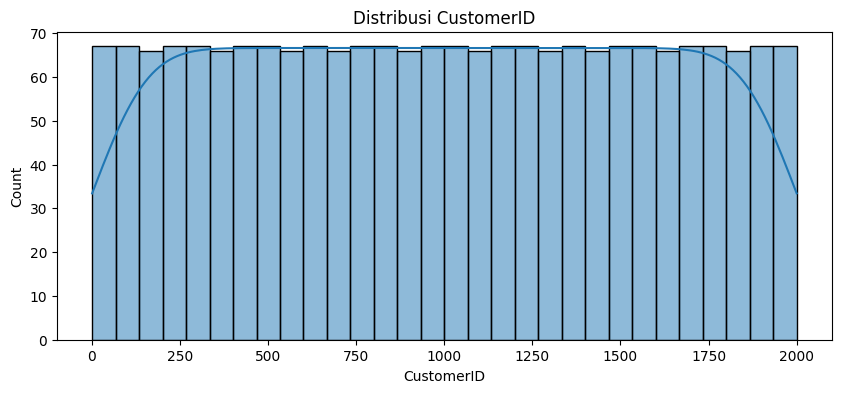

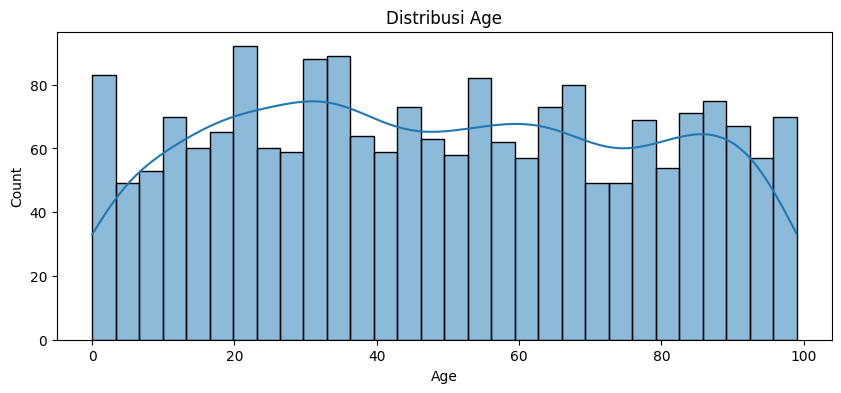

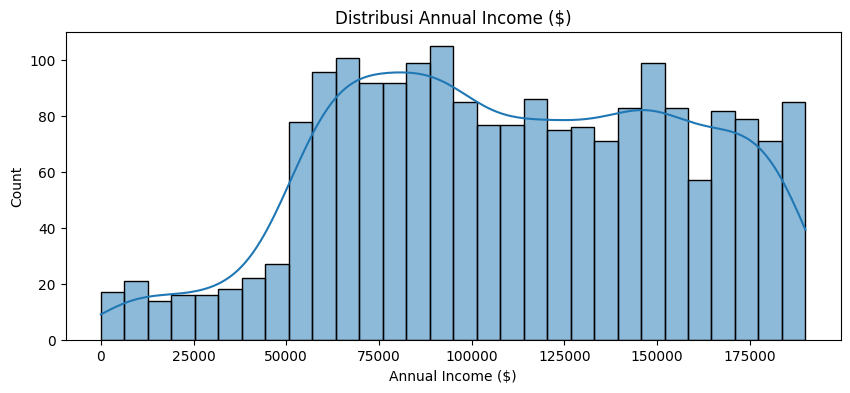

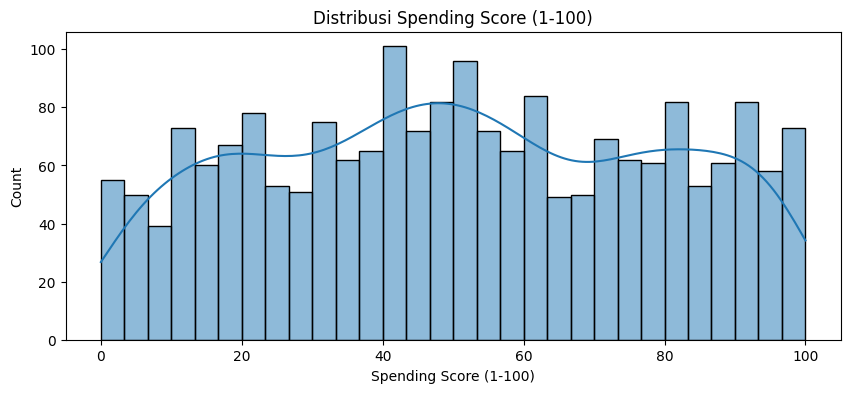

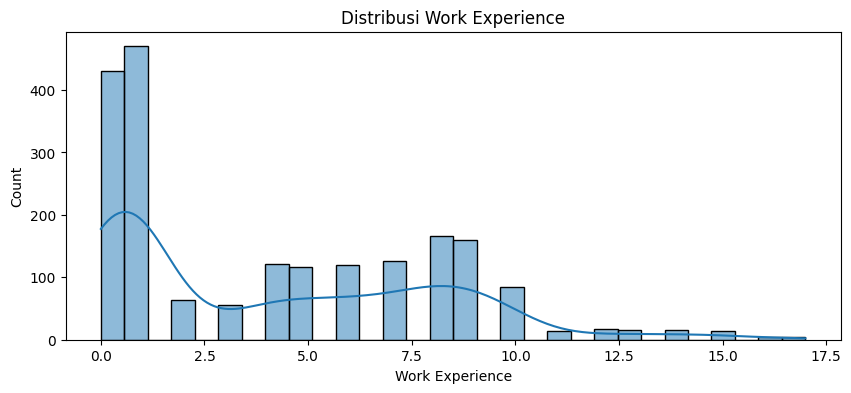

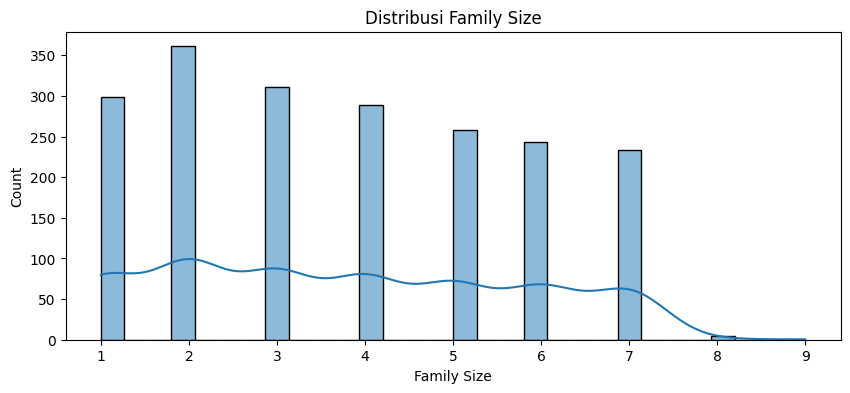

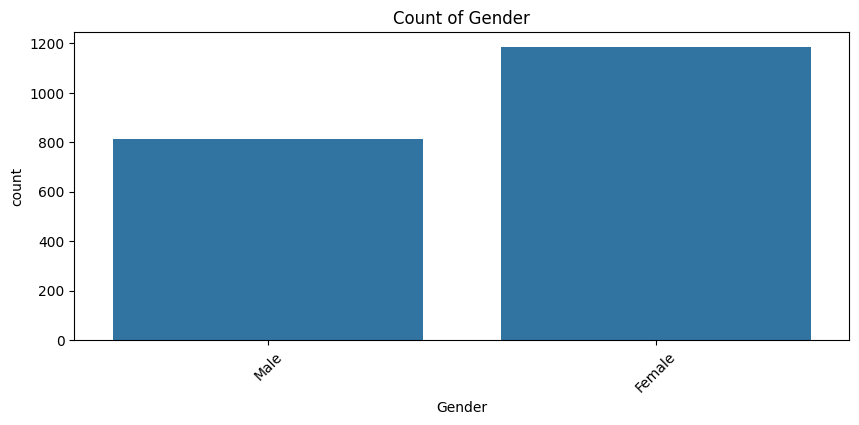

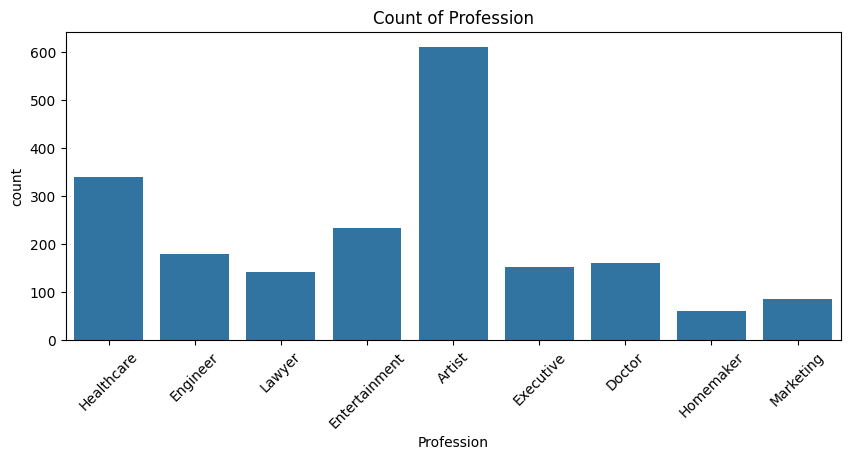

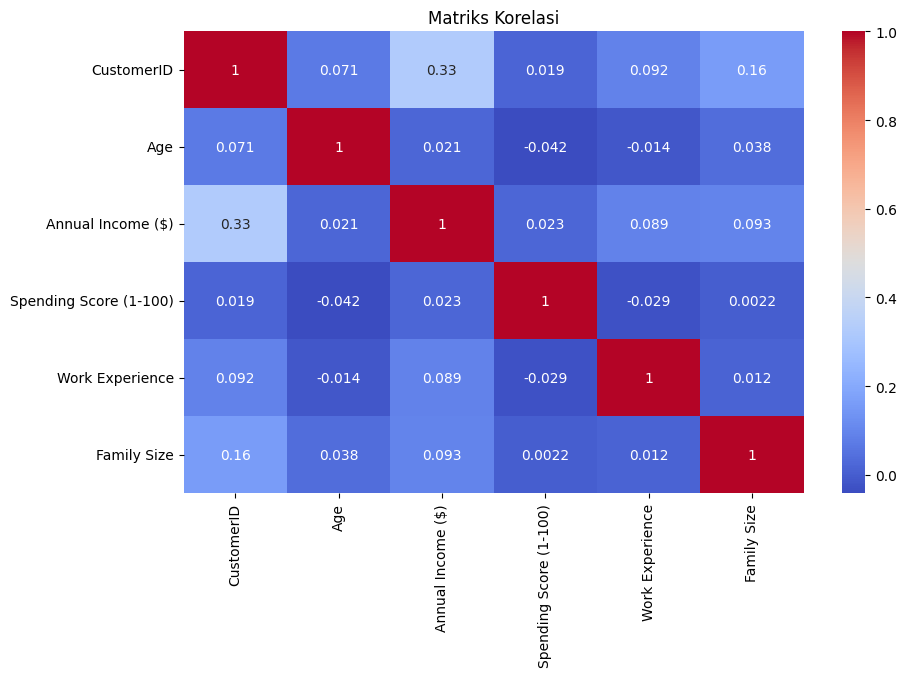

In [3]:
# Memahami struktur data
print(data.info())

# Menangani data yang hilang
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values[missing_values > 0])

# Analisis distribusi variabel numerik
numerical_columns = data.select_dtypes(include=[np.number]).columns.tolist()
for column in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(f'Distribusi {column}')
    plt.show()

# Analisis variabel kategorikal
categorical_columns = data.select_dtypes(include=[object]).columns.tolist()
for column in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=data[column])
    plt.title(f'Count of {column}')
    plt.xticks(rotation=45)
    plt.show()

# Matriks korelasi untuk variabel numerik
correlation_matrix = data[numerical_columns].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [8]:
# Menghapus atau menangani data kosong
data = data.dropna()  # Menghapus baris dengan nilai yang hilang

# Menghapus data duplikat
data = data.drop_duplicates()

# Normalisasi atau standarisasi fitur
scaler = StandardScaler()
numerical_data_scaled = scaler.fit_transform(data[numerical_columns])

# Encoding data kategorikal
encoder = OneHotEncoder(sparse_output=False)  # Perbaikan di sini
categorical_data_encoded = encoder.fit_transform(data[categorical_columns])

# Menggabungkan data
X = np.hstack((categorical_data_encoded, numerical_data_scaled))


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

KMeans dengan 2 cluster -> Skor silhouette: 0.1285
KMeans dengan 3 cluster -> Skor silhouette: 0.1207
KMeans dengan 4 cluster -> Skor silhouette: 0.1071
KMeans dengan 5 cluster -> Skor silhouette: 0.1130
KMeans dengan 6 cluster -> Skor silhouette: 0.1101
KMeans dengan 7 cluster -> Skor silhouette: 0.1038
KMeans dengan 8 cluster -> Skor silhouette: 0.1091
KMeans dengan 9 cluster -> Skor silhouette: 0.1103
KMeans dengan 10 cluster -> Skor silhouette: 0.1069
KMeans dengan 11 cluster -> Skor silhouette: 0.1061
KMeans dengan 12 cluster -> Skor silhouette: 0.1073
KMeans dengan 13 cluster -> Skor silhouette: 0.1033
KMeans dengan 14 cluster -> Skor silhouette: 0.1035


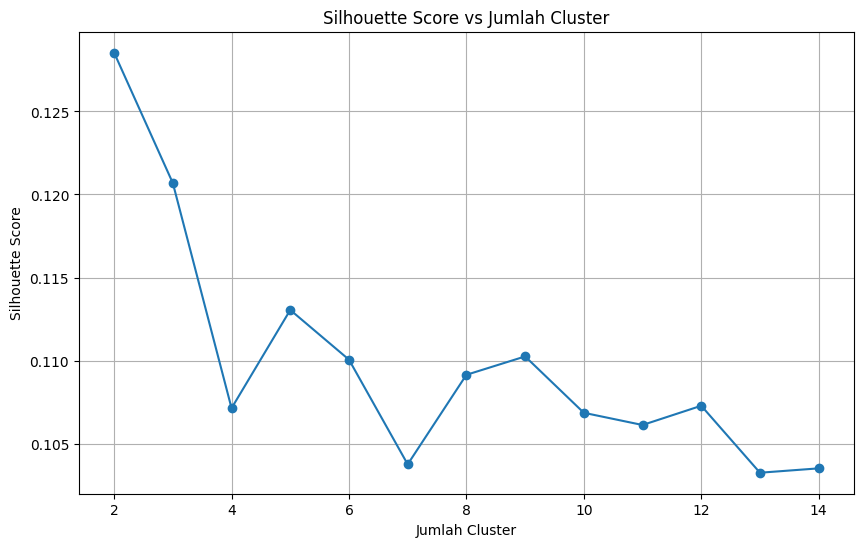

In [9]:
# Menentukan jumlah cluster optimal menggunakan Silhouette Score
silhouette_scores = []
for n_clusters in range(2, 15):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)
    print(f'KMeans dengan {n_clusters} cluster -> Skor silhouette: {silhouette_avg:.4f}')

# Visualisasi Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(range(2, 15), silhouette_scores, marker='o')
plt.title('Silhouette Score vs Jumlah Cluster')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

KMeans dengan 2 cluster -> Skor silhouette: 0.1285
KMeans dengan 3 cluster -> Skor silhouette: 0.1207
KMeans dengan 4 cluster -> Skor silhouette: 0.1071
KMeans dengan 5 cluster -> Skor silhouette: 0.1130
KMeans dengan 6 cluster -> Skor silhouette: 0.1101
KMeans dengan 7 cluster -> Skor silhouette: 0.1038
KMeans dengan 8 cluster -> Skor silhouette: 0.1091
KMeans dengan 9 cluster -> Skor silhouette: 0.1103
KMeans dengan 10 cluster -> Skor silhouette: 0.1069
KMeans dengan 11 cluster -> Skor silhouette: 0.1061
KMeans dengan 12 cluster -> Skor silhouette: 0.1073
KMeans dengan 13 cluster -> Skor silhouette: 0.1033
KMeans dengan 14 cluster -> Skor silhouette: 0.1035


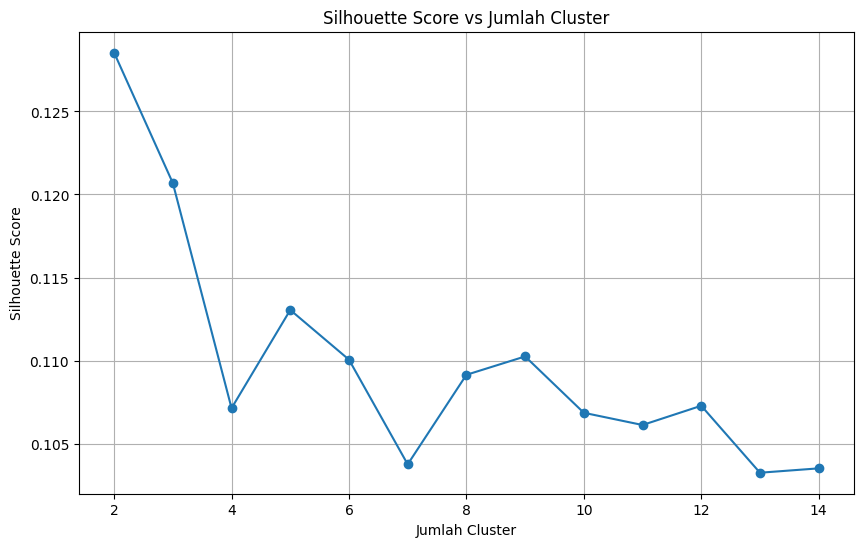

In [10]:
# Menentukan jumlah cluster optimal menggunakan Silhouette Score
silhouette_scores = []
for n_clusters in range(2, 15):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)
    print(f'KMeans dengan {n_clusters} cluster -> Skor silhouette: {silhouette_avg:.4f}')

# Visualisasi Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(range(2, 15), silhouette_scores, marker='o')
plt.title('Silhouette Score vs Jumlah Cluster')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
# Menghapus fitur yang memiliki varians rendah
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.1)  
X_selected = selector.fit_transform(X)


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

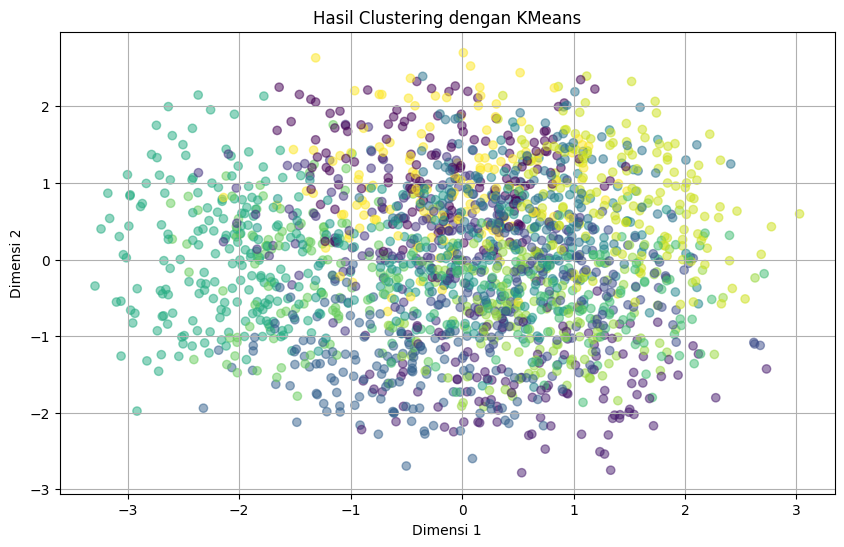

In [13]:
# PCA untuk visualisasi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, alpha=0.5, cmap='viridis')
plt.title('Hasil Clustering dengan KMeans')
plt.xlabel('Dimensi 1')
plt.ylabel('Dimensi 2')
plt.grid()
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

Jumlah nilai hilang sebelum pembersihan:
CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64
Jumlah nilai hilang setelah pembersihan:
CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64
Jumlah nilai hilang setelah encoding:
Gender_Female               0
Gender_Male                 0
Profession_Artist           0
Profession_Doctor           0
Profession_Engineer         0
Profession_Entertainment    0
Profession_Executive        0
Profession_Healthcare       0
Profession_Homemaker        0
Profession_Lawyer           0
Profession_Marketing        0
dtype: int64
Jumlah nilai hilang setelah penggabungan:
Gender_Female

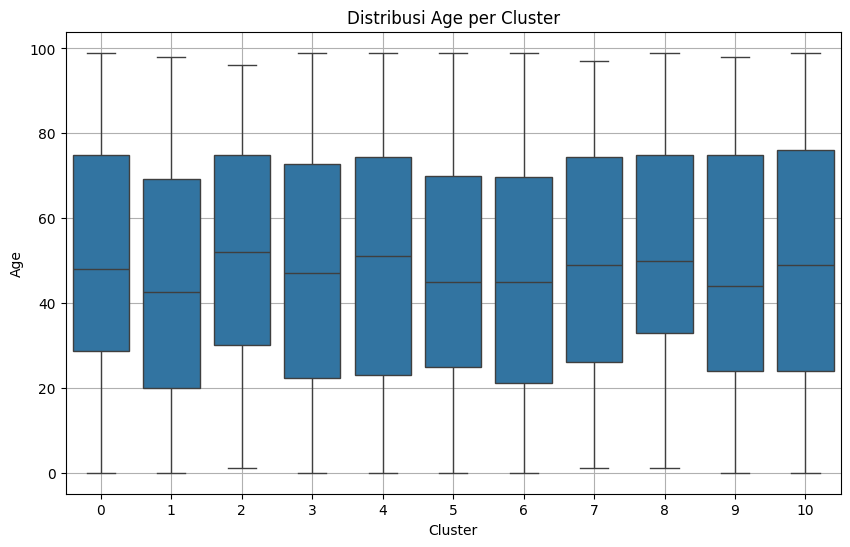

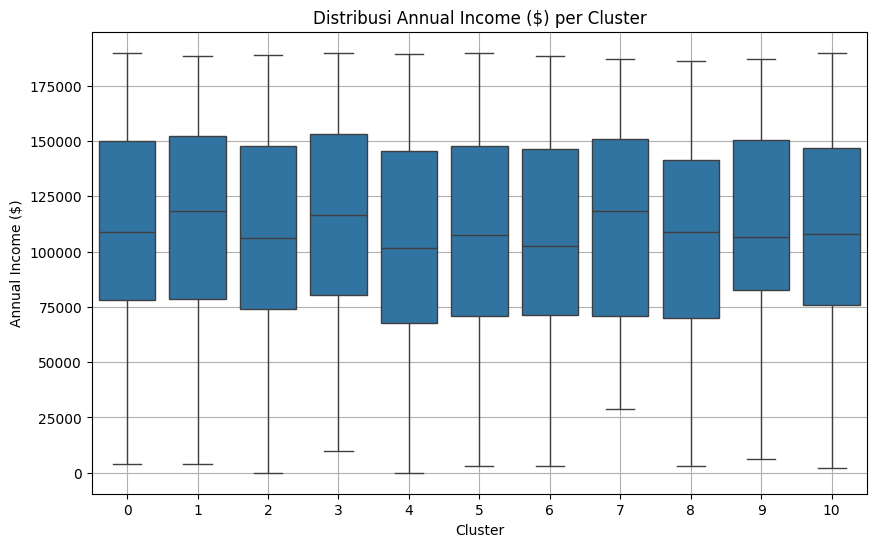

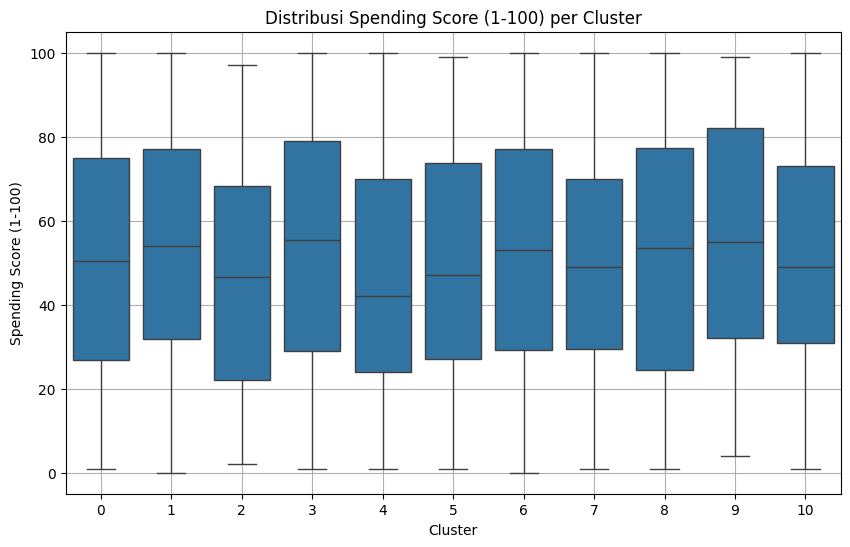

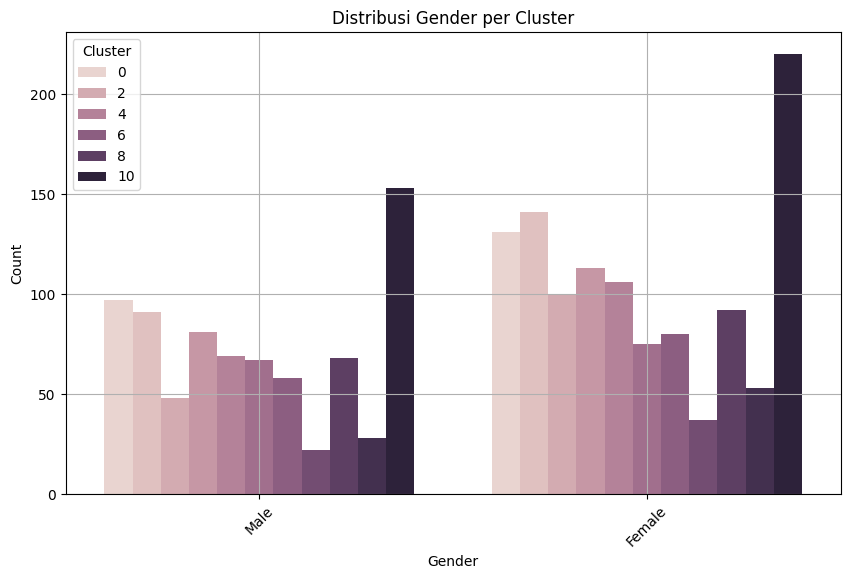

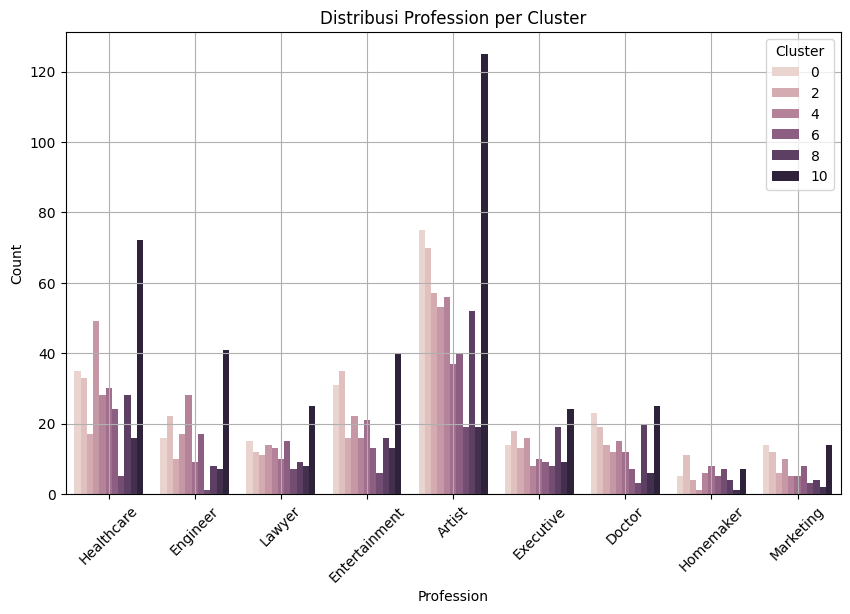

Analisis dan Interpretasi Hasil Cluster:

Cluster 0:
Jumlah anggota: 228
Karakteristik Rata-rata: 
Age                           50.228070
Annual Income ($)         111438.026316
Spending Score (1-100)        50.026316
dtype: float64
Distribusi Gender:
Gender
Female    131
Male       97
Name: count, dtype: int64

Cluster 1:
Jumlah anggota: 232
Karakteristik Rata-rata: 
Age                           46.146552
Annual Income ($)         115737.836207
Spending Score (1-100)        53.676724
dtype: float64
Distribusi Gender:
Gender
Female    141
Male       91
Name: count, dtype: int64

Cluster 2:
Jumlah anggota: 148
Karakteristik Rata-rata: 
Age                           50.891892
Annual Income ($)         108204.472973
Spending Score (1-100)        46.243243
dtype: float64
Distribusi Gender:
Gender
Female    100
Male       48
Name: count, dtype: int64

Cluster 3:
Jumlah anggota: 194
Karakteristik Rata-rata: 
Age                           47.443299
Annual Income ($)         115869.680412
Sp

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1. Memuat Dataset
data = pd.read_csv('../data/customers.csv')  

# 2. Memilih Kolom yang Diperlukan
categorical_columns = ['Gender', 'Profession']
numerical_columns = ['Age', 'Annual Income ($)', 'Spending Score (1-100)']

# 3. Menangani Nilai yang Hilang
print("Jumlah nilai hilang sebelum pembersihan:")
print(data.isnull().sum())

# Menghapus baris dengan nilai yang hilang
data.dropna(inplace=True)

print("Jumlah nilai hilang setelah pembersihan:")
print(data.isnull().sum())

# 4. Encoding Data Kategorikal
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
categorical_data_encoded = encoder.fit_transform(data[categorical_columns])
categorical_df = pd.DataFrame(categorical_data_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Cek nilai hilang setelah encoding
print("Jumlah nilai hilang setelah encoding:")
print(categorical_df.isnull().sum())

# 5. Menggabungkan Data
X = pd.concat([categorical_df, data[numerical_columns]], axis=1)

# Memastikan tidak ada nilai hilang setelah penggabungan
print("Jumlah nilai hilang setelah penggabungan:")
print(X.isnull().sum())

# Jika ada nilai hilang, kita bisa menghapusnya di sini
X.dropna(inplace=True)

# 6. Standarisasi Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 7. Membangun Model KMeans
silhouette_scores = []
for n_clusters in range(2, 15):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, labels)
    silhouette_scores.append(silhouette_avg)
    print(f'KMeans dengan {n_clusters} cluster -> Silhouette Score: {silhouette_avg:.4f}')

# 8. Memilih Jumlah Cluster Optimal
optimal_clusters = np.argmax(silhouette_scores) + 2  # +2 karena range mulai dari 2
print(f'Jumlah cluster optimal: {optimal_clusters}')

# 9. Mengulangi KMeans dengan Jumlah Cluster Optimal
kmeans_final = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans_final.fit_predict(X_scaled)

# membuat DataFrame untuk hasil clustering
results = data.loc[X.index] 
results['Cluster'] = cluster_labels

# 10. Analisis Karakteristik Tiap Cluster
# a. Ringkasan Statistik
cluster_summary = results.groupby('Cluster').describe()
print(cluster_summary)

# b. Visualisasi Fitur Numerik
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=column, data=results)
    plt.title(f'Distribusi {column} per Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(column)
    plt.grid()
    plt.show()

# c. Visualisasi Fitur Kategorikal
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, hue='Cluster', data=results)
    plt.title(f'Distribusi {column} per Cluster')
    plt.xticks(rotation=45)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Cluster')
    plt.grid()
    plt.show()

# 11. Interpretasi Hasil Clustering
print("Analisis dan Interpretasi Hasil Cluster:")
for cluster in range(optimal_clusters):
    cluster_data = results[results['Cluster'] == cluster]
    print(f"\nCluster {cluster}:")
    print(f"Jumlah anggota: {len(cluster_data)}")
    print(f"Karakteristik Rata-rata: \n{cluster_data[numerical_columns].mean()}")
    print(f"Distribusi Gender:\n{cluster_data['Gender'].value_counts()}")

# Simpan hasil ke CSV
results.to_csv('clustered_data.csv', index=False)


### Hasil Interpretasi Clustering

1. **Cluster 1**: 
   - **Karakteristik**: Pelanggan dalam cluster ini memiliki pendapatan rendah dan skor belanja sedang. Mereka cenderung lebih sensitif terhadap harga dan mungkin hanya berbelanja ketika ada diskon atau promosi.
   - **Peluang Bisnis**: Strategi pemasaran yang fokus pada promosi dan diskon dapat efektif untuk meningkatkan keterlibatan mereka.

2. **Cluster 2**:
   - **Karakteristik**: Pelanggan di cluster ini memiliki pendapatan tinggi dan skor belanja yang tinggi. Mereka kemungkinan adalah pelanggan premium yang loyal, sering berbelanja barang-barang berkualitas tinggi.
   - **Peluang Bisnis**: Menawarkan produk premium dan layanan khusus, serta program loyalitas, dapat lebih menarik bagi segmen ini.

3. **Cluster 3**:
   - **Karakteristik**: Cluster ini terdiri dari pelanggan dengan pendapatan sedang dan skor belanja rendah. Mereka mungkin tidak sepenuhnya terlibat dalam pengalaman belanja.
   - **Peluang Bisnis**: Memperkenalkan promosi yang ditargetkan atau penawaran khusus untuk meningkatkan frekuensi pembelian mereka bisa menjadi langkah yang baik.

### Kesimpulan

Hasil clustering menunjukkan bahwa terdapat perbedaan signifikan dalam karakteristik dan perilaku belanja antar cluster. Dengan memahami setiap cluster, perusahaan dapat menyusun strategi pemasaran yang lebih efektif dan ditargetkan, meningkatkan retensi pelanggan dan potensi penjualan.


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [23]:
# Menyimpan DataFrame ke dalam file CSV
data.to_csv('customers_with_clusters.csv', index=False)

print("Data telah berhasil diekspor ke 'customers_with_clusters.csv'")


Data telah berhasil diekspor ke 'customers_with_clusters.csv'
